Installiamo la libreria Phyton corrispondente al sito di UCI Machine Learning Repository.

In [ ]:
pip install ucimlrepo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Importiamo il dataset **Seoul Bike Sharing Demand** da Uci

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
seoul_bike_sharing_demand = fetch_ucirepo(id=560)

# data (as pandas dataframes)
X = seoul_bike_sharing_demand.data.features
y = seoul_bike_sharing_demand.data.targets

# metadata
print(seoul_bike_sharing_demand.metadata)

# variable information
print(seoul_bike_sharing_demand.variables)



{'uci_id': 560, 'name': 'Seoul Bike Sharing Demand', 'repository_url': 'https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand', 'data_url': 'https://archive.ics.uci.edu/static/public/560/data.csv', 'abstract': 'The dataset contains count of public bicycles rented per hour in the Seoul Bike Sharing System, with corresponding weather data and holiday information', 'area': 'Business', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 8760, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Functioning Day'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Mon Feb 05 2024', 'dataset_doi': '10.24432/C5F62R', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': 'Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and a

Stampiamo il dataset separando la colonna target dalle altre


In [ ]:
display(X)
display(y)

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday
0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
2,1/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday
3,1/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
4,1/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday


,Functioning Day
0,Yes
1,Yes
2,Yes
3,Yes
4,Yes
...,...
8755,Yes
8756,Yes
8757,Yes
8758,Yes


Usiamo la funzione describe sul Dataframe X per osservare le proprietà statistiche delle feature.

In [ ]:
X.describe()

,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


Aggiungi una colonna che indica i giorni della settimana sincronizzata con il calendario del dataset. Iniziamo da 1/12/17 che era un venerdì (quindi 5)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

# Creiamo una colonna nel dataset X chiamata "Day"
X['Day'] = 0
# Ogni 24 campioni sono associati ad un giorno (Lunedì 1, Martedi 2, ecc..)
# Parto dal valore 5 perchè 1/12/2017 era un Venerdi
current_day = 5
for i in range(0, len(X), 24):
  X.loc[i:min(i + 23, len(X) -1), 'Day'] = current_day
  current_day = (current_day % 7) + 1

display(X)
display(y)


,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Day
0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,5
1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,5
2,1/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,5
3,1/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,5
4,1/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,5
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,5
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,5
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,5


,Functioning Day
0,Yes
1,Yes
2,Yes
3,Yes
4,Yes
...,...
8755,Yes
8756,Yes
8757,Yes
8758,Yes


Vediamo i valori che possono essere assunti dal target

In [ ]:
print(y['Functioning Day'].unique())


['Yes' 'No']


Stampiamo la distribuzione del valore target

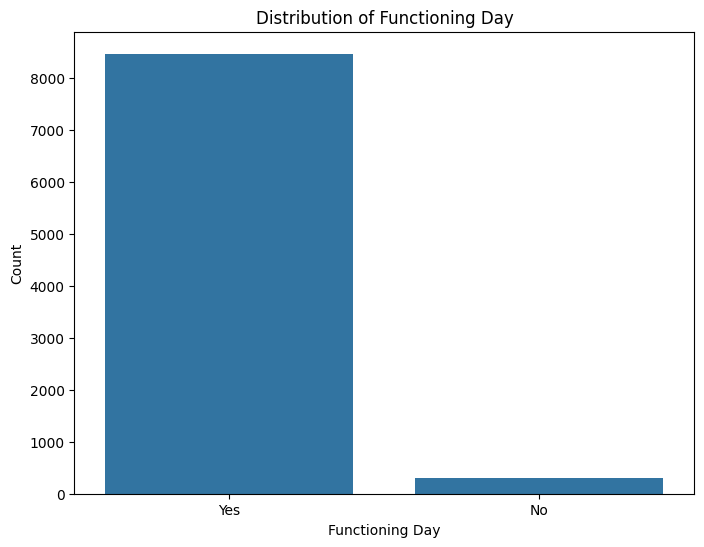

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='Functioning Day', data=y)
plt.title('Distribution of Functioning Day')
plt.xlabel('Functioning Day')
plt.ylabel('Count')
plt.show()

Il dataset è molto sbilanciato e la classificazione che si dovrebbe ottenere è poco chiara. Decidiamo di cambiare la variabile target scegliendo **Rented Bike Count** e cambiando l'obiettivo del problema: per ogni ora provare ad approssimare quante bici sono state noleggiate.


Inizio eliminando tutte le istanze in cui **Functioning Day** vale 0, quindi le ore in cui il servizio non era disponibile. Non avrebbe senso considerarle in quanto in queste ore il numero di bici noleggiate è sempre zero


,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Day
0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,5
1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,5
2,1/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,5
3,1/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,5
4,1/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,5
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,5
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,5
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,5


,Functioning Day
0,Yes
1,Yes
2,Yes
3,Yes
4,Yes
...,...
8755,Yes
8756,Yes
8757,Yes
8758,Yes


['Yes']


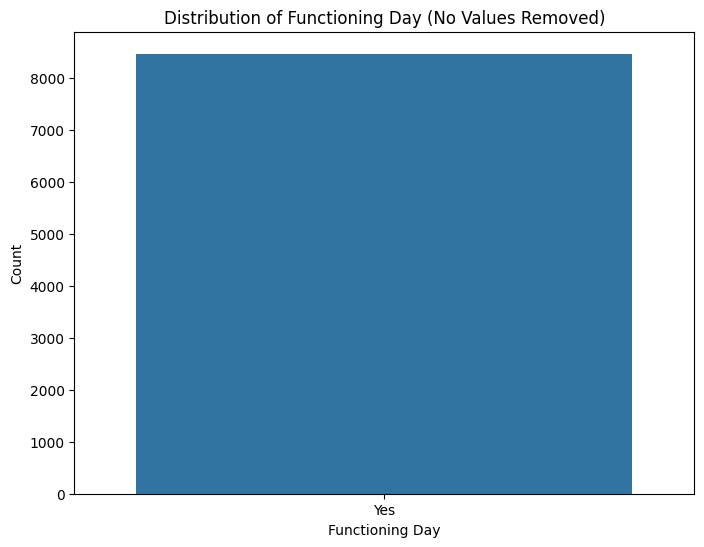

In [ ]:
# Ora abbiamo solo i dati in cui 'Functioning Day' non assume valore 'No'
y_filtered = y[y['Functioning Day'] != 'No']

indices_to_keep = y_filtered.index

X_filtered = X.loc[indices_to_keep]


display(X_filtered)
display(y_filtered)

print(y_filtered['Functioning Day'].unique())

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(x='Functioning Day', data=y_filtered)
plt.title('Distribution of Functioning Day (No Values Removed)')
plt.xlabel('Functioning Day')
plt.ylabel('Count')
plt.show()


Cambiamo la colonna target, selezioniamo 'Rented Bike Count' come nuovo target. Dunque, per ogni ora, proveremo a predirre quante bici sono state noleggiate\:::

In [ ]:
y_filtered['Rented Bike Count'] = X_filtered['Rented Bike Count']
y_filtered = y_filtered.drop(columns =['Functioning Day'])

# Rimuovo la colonna 'Rented Bike Count'
X_filtered = X_filtered.drop(columns=['Rented Bike Count'])

display(X_filtered)
display(y_filtered)


<ipython-input-12-c03583fffd74>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_filtered['Rented Bike Count'] = X_filtered['Rented Bike Count']


,Date,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Day
0,1/12/2017,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,5
1,1/12/2017,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,5
2,1/12/2017,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,5
3,1/12/2017,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,5
4,1/12/2017,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,5
8756,30/11/2018,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,5
8757,30/11/2018,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,5
8758,30/11/2018,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,5


,Rented Bike Count
0,254
1,204
2,173
3,107
4,78
...,...
8755,1003
8756,764
8757,694
8758,712


Vediamo la distribuzione della variabile nuova variabile target

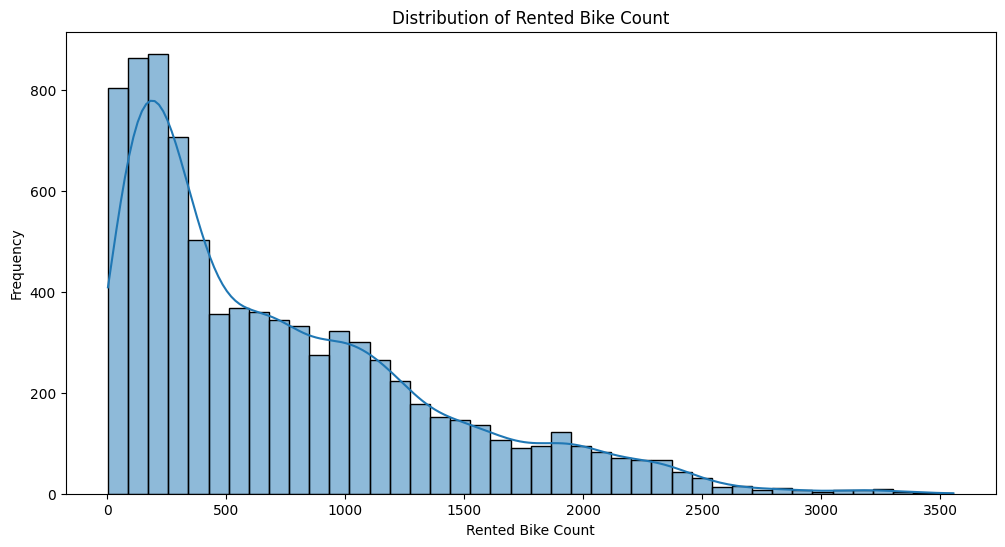

In [ ]:
# Mostra che valori possono essere assunti dalla variabile target su un grafico

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(y_filtered['Rented Bike Count'], kde=True)
plt.title('Distribution of Rented Bike Count')
plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency')
plt.show()


Ci rendiamo conto che approssimare esattamente il numero di bici/ora sarebbe eccessivamente complesso in quanto impllica l'utilizzo di una regressione tra più di 3500 valori, dei quali oltre la metà è poco rappresentata nel dataset


Introduciamo una nuova variabile **Rented_Bike_Count_Class** per trasformare il problema in una classificazione multiclasse. Calcoliamo i quartili di **Rented Bike Count** e sfruttiamo gli intervalli tra di essi per creare quattro classi.
Il **Rented_Bike_Count_Class** di ogni istanza assume il numero della classe che corrisponde all'intervallo corretto.

In [ ]:
# Calcolo i quartili per dividere i dati in 4 gruppi uguali
quantiles = y_filtered['Rented Bike Count'].quantile([0.25, 0.5, 0.75])

# Creo una nuova colonna 'Rented_Bike_Count_Class' basata sui quartili
y_filtered['Rented_Bike_Count_Class'] = 0

# Assegno la label della classe in base ai quartili
y_filtered.loc[y_filtered['Rented Bike Count'] <= quantiles[0.25], 'Rented_Bike_Count_Class'] = 1
y_filtered.loc[(y_filtered['Rented Bike Count'] > quantiles[0.25]) & (y_filtered['Rented Bike Count'] <= quantiles[0.5]), 'Rented_Bike_Count_Class'] = 2
y_filtered.loc[(y_filtered['Rented Bike Count'] > quantiles[0.5]) & (y_filtered['Rented Bike Count'] <= quantiles[0.75]), 'Rented_Bike_Count_Class'] = 3
y_filtered.loc[y_filtered['Rented Bike Count'] > quantiles[0.75], 'Rented_Bike_Count_Class'] = 4

display(y_filtered)




,Rented Bike Count,Rented_Bike_Count_Class
0,254,2
1,204,1
2,173,1
3,107,1
4,78,1
...,...,...
8755,1003,3
8756,764,3
8757,694,3
8758,712,3


Mostriamo la distribuzione della nuova variabile target. Grazie alla scelta dei quartili abbiamo 4 classi perfettamente bilanciate.

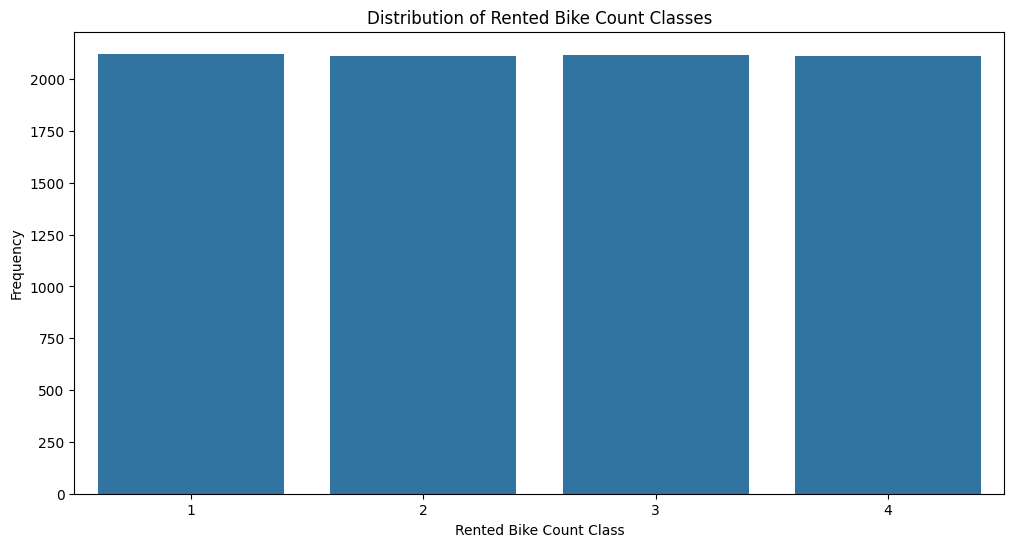

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Rented_Bike_Count_Class', data=y_filtered)
plt.title('Distribution of Rented Bike Count Classes')
plt.xlabel('Rented Bike Count Class')
plt.ylabel('Frequency')
plt.show()

Mostriamo i valori massimi di ciascun intervallo per comprendere gli intervalli

In [ ]:
print("Limit values for each class:")
for i in range(1, 5):
    limit = y_filtered[y_filtered['Rented_Bike_Count_Class'] == i]['Rented Bike Count'].max()
    print(f"Class {i}: {limit}")


Limit values for each class:
Class 1: 214
Class 2: 542
Class 3: 1084
Class 4: 3556


Eliminiamo il valore di **Rented Bike Count** e teniamo **Rented_Bike_Count_Class** come unica variabile target

In [ ]:
X = X_filtered
y = y_filtered['Rented_Bike_Count_Class']

display(X)
display(y)

,Date,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Day
0,1/12/2017,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,5
1,1/12/2017,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,5
2,1/12/2017,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,5
3,1/12/2017,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,5
4,1/12/2017,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,5
8756,30/11/2018,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,5
8757,30/11/2018,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,5
8758,30/11/2018,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,5


,Rented_Bike_Count_Class
0,2
1,1
2,1
3,1
4,1
...,...
8755,3
8756,3
8757,3
8758,3


In [ ]:
daily_data = []


for i in range(0, len(X), 24):
  chunk = X[i:i+24]

  numerical_features = chunk.select_dtypes(include=['number'])
  daily_numerical_data = numerical_features.mean()

  categorical_features = chunk.select_dtypes(exclude=['number']).iloc[0]

  daily_sample = pd.concat([daily_numerical_data, categorical_features])

  daily_data.append(daily_sample)

daily_df = pd.DataFrame(daily_data)

display(daily_df)


,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Day,Date,Seasons,Holiday
0,11.5,-2.454167,45.875000,1.537500,1870.750000,-13.545833,0.248750,0.000000,0.000000,5.000000,1/12/2017,Winter,No Holiday
1,11.5,1.325000,61.958333,1.712500,1471.083333,-5.716667,0.263750,0.000000,0.000000,6.000000,2/12/2017,Winter,No Holiday
2,11.5,4.875000,81.541667,1.612500,455.750000,1.883333,0.125417,0.166667,0.000000,7.000000,3/12/2017,Winter,No Holiday
3,11.5,-0.304167,52.500000,3.450000,1362.833333,-9.925000,0.282917,0.004167,0.000000,1.000000,4/12/2017,Winter,No Holiday
4,11.5,-4.458333,36.416667,1.108333,1959.458333,-17.425000,0.035833,0.000000,0.000000,2.000000,5/12/2017,Winter,No Holiday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,11.5,6.720833,69.333333,0.929167,476.500000,1.041667,0.418750,0.000000,0.033333,1.291667,26/11/2018,Autumn,No Holiday
349,11.5,7.058333,53.000000,1.654167,598.875000,-2.670833,0.192500,0.000000,0.000000,2.291667,27/11/2018,Autumn,No Holiday
350,11.5,4.720833,25.875000,1.420833,1712.083333,-13.820833,0.403333,0.000000,0.000000,3.291667,28/11/2018,Autumn,No Holiday
351,11.5,2.825000,47.833333,1.237500,1422.458333,-7.595833,0.117083,0.000000,0.000000,4.291667,29/11/2018,Autumn,No Holiday


In [ ]:
daily_target_means = y_filtered.groupby(y_filtered.index // 24)['Rented Bike Count'].mean()

daily_df['Daily_Mean_Rented_Bike_Count'] = daily_target_means.values

display(daily_target_means)


,Rented Bike Count
0,397.458333
1,355.125000
2,300.916667
3,363.708333
4,346.125000
...,...
360,715.083333
361,678.416667
362,688.500000
363,684.291667


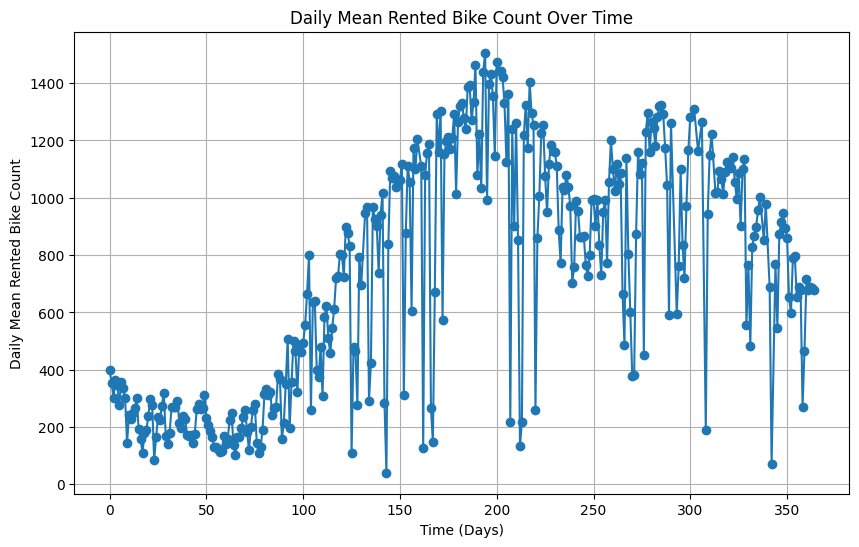

In [ ]:
# Mostra su un grafico le medie in funzione del tempo in daily_target_means

import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(daily_target_means.index, daily_target_means.values, marker='o', linestyle='-')
plt.xlabel("Time (Days)")
plt.ylabel("Daily Mean Rented Bike Count")
plt.title("Daily Mean Rented Bike Count Over Time")
plt.grid(True)
plt.show()


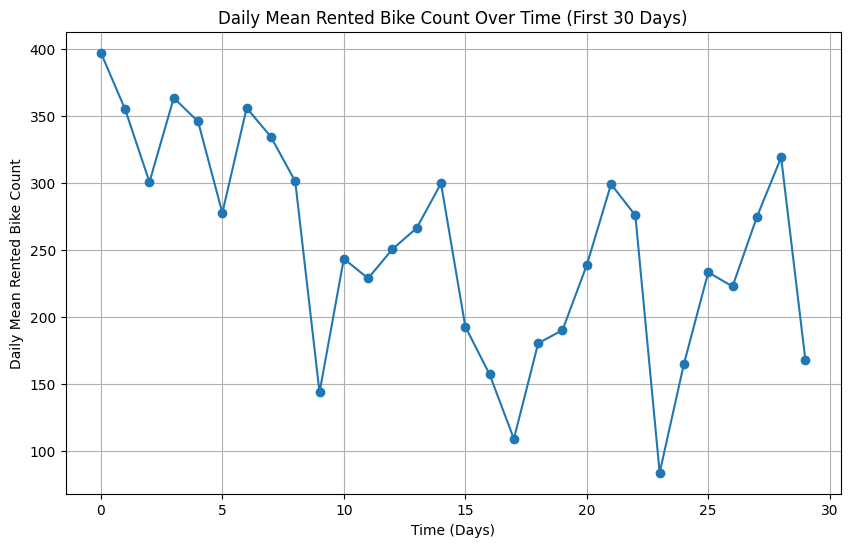

In [ ]:
# Mostra in un grafico le medie dei primi 30 giorni


plt.figure(figsize=(10, 6))
plt.plot(daily_target_means.index[:30], daily_target_means.values[:30], marker='o', linestyle='-') # Plot only the first 30 days
plt.xlabel("Time (Days)")
plt.ylabel("Daily Mean Rented Bike Count")
plt.title("Daily Mean Rented Bike Count Over Time (First 30 Days)")
plt.grid(True)
plt.show()


Visulizziamo la distribuzione della variabile **Holiday**

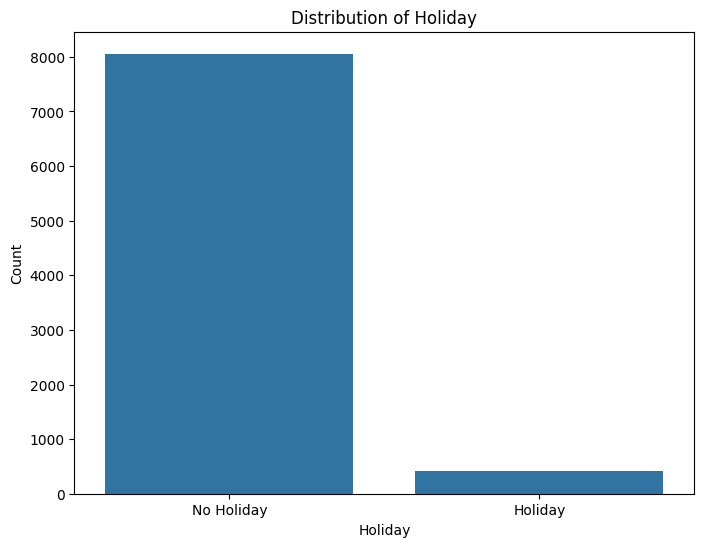

In [ ]:
# Visualizza in un grafico la distribuzione della variabile Holiday

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'X' is your dataframe and 'Holiday' is a column in it.
plt.figure(figsize=(8, 6))
sns.countplot(x='Holiday', data=X)
plt.title('Distribution of Holiday')
plt.xlabel('Holiday')
plt.ylabel('Count')
plt.show()


Trasformiamo ogni occorrenza della colonna **Holiday** con valore 'No holiday' in 0, in 1 altrimenti

In [ ]:

X['Holiday'] = X['Holiday'].apply(lambda x: 0 if x == 'No Holiday' else 1)


Eliminiamo la data di rilevazione conservando solo il mese

In [ ]:
X['Date'] = pd.to_datetime(X['Date'], format='%d/%m/%Y') # Cambio formato in '%d/%m/%Y'

X['Month'] = X['Date'].dt.month
X.drop(columns=['Date'], inplace=True)

display(X)


,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Day,Month
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,5,12
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,5,12
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,5,12
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,5,12
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,5,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,0,5,11
8756,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,0,5,11
8757,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,0,5,11
8758,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,0,5,11


Trasformiamo in numerica anche la colonna **Seasons**

In [ ]:
season_mapping = {'Spring': 1, 'Summer': 2, 'Autumn': 3, 'Winter': 4}

X['Seasons'] = X['Seasons'].map(season_mapping)

display(X)


,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Day,Month
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,4,0,5,12
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,4,0,5,12
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,4,0,5,12
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,4,0,5,12
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,4,0,5,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,3,0,5,11
8756,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,3,0,5,11
8757,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,3,0,5,11
8758,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,3,0,5,11


Applichiamo un encoding ciclico su tutte quelle variabili che sono cicliche all'interno del dataset


In [ ]:

max_day = 7  # Giorni della settimana (0-6)
max_month = 12  # Mesi dell'anno (1-12)
max_hour = 24  # Ore del giorno (0-23)
max_seasons = 4

# Encoding ciclico per il giorno della settimana
X['Day_sin'] = np.sin(2 * np.pi * X['Day'] / max_day)
X['Day_cos'] = np.cos(2 * np.pi * X['Day'] / max_day)

# Encoding ciclico per il mese
X['Month_sin'] = np.sin(2 * np.pi * X['Month'] / max_month)
X['Month_cos'] = np.cos(2 * np.pi * X['Month'] / max_month)

X['Hour_sin'] = np.sin(2 * np.pi * X['Hour'] / max_hour)
X['Hour_cos'] = np.cos(2 * np.pi * X['Hour'] / max_hour)

X['Seasons_sin'] = np.sin(2 * np.pi * X['Seasons'] / max_seasons)
X['Seasons_cos'] = np.cos(2 * np.pi * X['Seasons'] / max_seasons)

# Rimuoviamo le colonne originali
X = X.drop(columns=['Day', 'Month', 'Hour', 'Seasons'])

# Visualizziamo i primi dati trasformati
display(X)

,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Holiday,Day_sin,Day_cos,Month_sin,Month_cos,Hour_sin,Hour_cos,Seasons_sin,Seasons_cos
0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,-0.974928,-0.222521,-2.449294e-16,1.000000,0.000000,1.000000,-2.449294e-16,1.000000e+00
1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,-0.974928,-0.222521,-2.449294e-16,1.000000,0.258819,0.965926,-2.449294e-16,1.000000e+00
2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,-0.974928,-0.222521,-2.449294e-16,1.000000,0.500000,0.866025,-2.449294e-16,1.000000e+00
3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,-0.974928,-0.222521,-2.449294e-16,1.000000,0.707107,0.707107,-2.449294e-16,1.000000e+00
4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,-0.974928,-0.222521,-2.449294e-16,1.000000,0.866025,0.500000,-2.449294e-16,1.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,-0.974928,-0.222521,-5.000000e-01,0.866025,-0.965926,0.258819,-1.000000e+00,-1.836970e-16
8756,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,-0.974928,-0.222521,-5.000000e-01,0.866025,-0.866025,0.500000,-1.000000e+00,-1.836970e-16
8757,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,-0.974928,-0.222521,-5.000000e-01,0.866025,-0.707107,0.707107,-1.000000e+00,-1.836970e-16
8758,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,-0.974928,-0.222521,-5.000000e-01,0.866025,-0.500000,0.866025,-1.000000e+00,-1.836970e-16


Scaliamo i dati del dataset con standard scaler tranne la colonna **Holiday**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

columns_to_scale = [col for col in X.columns if col != 'Holiday_Holiday']
scaler.fit(X[columns_to_scale])

X[columns_to_scale] = scaler.transform(X[columns_to_scale])

display(X)


,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Holiday,Day_sin,Day_cos,Month_sin,Month_cos,Hour_sin,Hour_cos,Seasons_sin,Seasons_cos
0,-1.484762,-1.032395,0.458429,0.929577,-1.627067,-0.654079,-0.132495,-0.174951,-0.225032,-1.373649,-0.325788,-0.020298,1.418079,0.000718,1.414932,-0.037894,1.400043
1,-1.509548,-0.983575,-0.895248,0.929577,-1.627067,-0.654079,-0.132495,-0.174951,-0.225032,-1.373649,-0.325788,-0.020298,1.418079,0.366744,1.366744,-0.037894,1.400043
2,-1.550858,-0.934756,-0.701865,0.929577,-1.634619,-0.654079,-0.132495,-0.174951,-0.225032,-1.373649,-0.325788,-0.020298,1.418079,0.707825,1.225463,-0.037894,1.400043
3,-1.567382,-0.885937,-0.798556,0.929577,-1.627067,-0.654079,-0.132495,-0.174951,-0.225032,-1.373649,-0.325788,-0.020298,1.418079,1.000718,1.000718,-0.037894,1.400043
4,-1.550858,-1.081214,0.555121,0.929577,-1.702586,-0.654079,-0.132495,-0.174951,-0.225032,-1.373649,-0.325788,-0.020298,1.418079,1.225463,0.707825,-0.037894,1.400043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,-0.708138,-1.178853,0.845194,0.755525,-1.075775,-0.654079,-0.132495,-0.174951,-0.225032,-1.373649,-0.325788,-0.733279,1.230088,-1.365308,0.366744,-1.476335,0.007894
8756,-0.774233,-1.032395,0.555121,0.929577,-1.045567,-0.654079,-0.132495,-0.174951,-0.225032,-1.373649,-0.325788,-0.733279,1.230088,-1.224027,0.707825,-1.476335,0.007894
8757,-0.840329,-0.934756,-1.378704,0.877033,-1.045567,-0.654079,-0.132495,-0.174951,-0.225032,-1.373649,-0.325788,-0.733279,1.230088,-0.999282,1.000718,-1.476335,0.007894
8758,-0.881639,-0.837117,-0.701865,0.698056,-1.038015,-0.654079,-0.132495,-0.174951,-0.225032,-1.373649,-0.325788,-0.733279,1.230088,-0.706389,1.225463,-1.476335,0.007894


Visualizziamo la matrice di correlazione per identificare la dipendenza tra le variabili (tranne la variabile target)

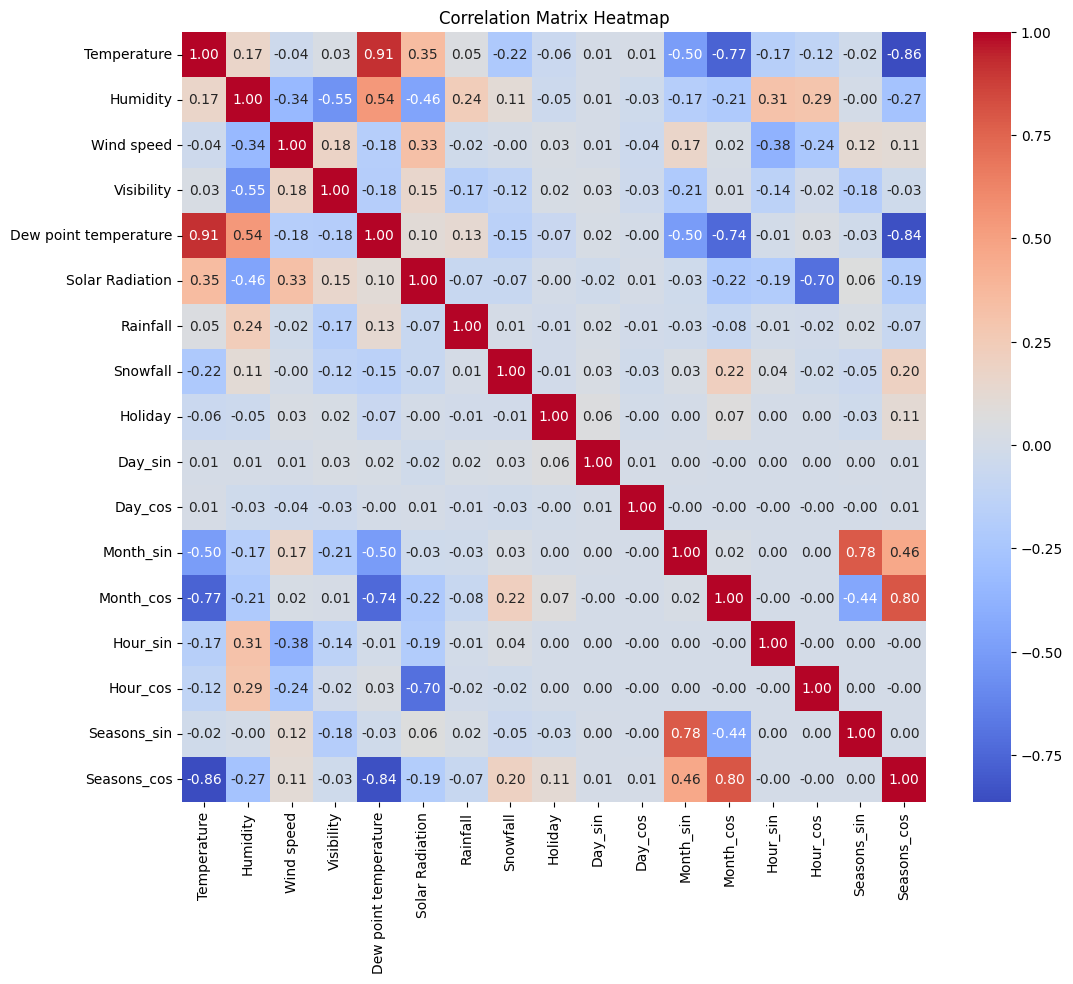

In [ ]:
# Calcolo la correlation matrix
correlation_matrix = X.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


In [ ]:
X_copy = X.copy()
y_copy = y.copy()

In [ ]:
X = X_copy.copy()
y = y_copy.copy()

Ci rendimo conto della profonda correlazione reciproca che esiste tra le variabili **Temperature, Dew point temperature, Seasons_sin, Seasons_cos, Month_cos, Month_sin**.

Eliminiamo **Temperature, Seasons_sin, Seasons_cos** in modo tale da non avere più coppie di variabili con un indice di correlazione > 0.75

In [ ]:
X.drop(columns = ['Temperature', 'Seasons_cos', 'Seasons_sin'], inplace=True)
display(X)

,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Holiday,Day_sin,Day_cos,Month_sin,Month_cos,Hour_sin,Hour_cos
0,-1.032395,0.458429,0.929577,-1.627067,-0.654079,-0.132495,-0.174951,-0.225032,-1.373649,-0.325788,-0.020298,1.418079,0.000718,1.414932
1,-0.983575,-0.895248,0.929577,-1.627067,-0.654079,-0.132495,-0.174951,-0.225032,-1.373649,-0.325788,-0.020298,1.418079,0.366744,1.366744
2,-0.934756,-0.701865,0.929577,-1.634619,-0.654079,-0.132495,-0.174951,-0.225032,-1.373649,-0.325788,-0.020298,1.418079,0.707825,1.225463
3,-0.885937,-0.798556,0.929577,-1.627067,-0.654079,-0.132495,-0.174951,-0.225032,-1.373649,-0.325788,-0.020298,1.418079,1.000718,1.000718
4,-1.081214,0.555121,0.929577,-1.702586,-0.654079,-0.132495,-0.174951,-0.225032,-1.373649,-0.325788,-0.020298,1.418079,1.225463,0.707825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,-1.178853,0.845194,0.755525,-1.075775,-0.654079,-0.132495,-0.174951,-0.225032,-1.373649,-0.325788,-0.733279,1.230088,-1.365308,0.366744
8756,-1.032395,0.555121,0.929577,-1.045567,-0.654079,-0.132495,-0.174951,-0.225032,-1.373649,-0.325788,-0.733279,1.230088,-1.224027,0.707825
8757,-0.934756,-1.378704,0.877033,-1.045567,-0.654079,-0.132495,-0.174951,-0.225032,-1.373649,-0.325788,-0.733279,1.230088,-0.999282,1.000718
8758,-0.837117,-0.701865,0.698056,-1.038015,-0.654079,-0.132495,-0.174951,-0.225032,-1.373649,-0.325788,-0.733279,1.230088,-0.706389,1.225463


Il dataset è ora completamente preprocessato e pronto alla fase successiva, quella di addestramento dei modelli

In [ ]:
display(X)

,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Holiday,Day_sin,Day_cos,Month_sin,Month_cos,Hour_sin,Hour_cos
0,-1.032395,0.458429,0.929577,-1.627067,-0.654079,-0.132495,-0.174951,-0.225032,-1.373649,-0.325788,-0.020298,1.418079,0.000718,1.414932
1,-0.983575,-0.895248,0.929577,-1.627067,-0.654079,-0.132495,-0.174951,-0.225032,-1.373649,-0.325788,-0.020298,1.418079,0.366744,1.366744
2,-0.934756,-0.701865,0.929577,-1.634619,-0.654079,-0.132495,-0.174951,-0.225032,-1.373649,-0.325788,-0.020298,1.418079,0.707825,1.225463
3,-0.885937,-0.798556,0.929577,-1.627067,-0.654079,-0.132495,-0.174951,-0.225032,-1.373649,-0.325788,-0.020298,1.418079,1.000718,1.000718
4,-1.081214,0.555121,0.929577,-1.702586,-0.654079,-0.132495,-0.174951,-0.225032,-1.373649,-0.325788,-0.020298,1.418079,1.225463,0.707825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,-1.178853,0.845194,0.755525,-1.075775,-0.654079,-0.132495,-0.174951,-0.225032,-1.373649,-0.325788,-0.733279,1.230088,-1.365308,0.366744
8756,-1.032395,0.555121,0.929577,-1.045567,-0.654079,-0.132495,-0.174951,-0.225032,-1.373649,-0.325788,-0.733279,1.230088,-1.224027,0.707825
8757,-0.934756,-1.378704,0.877033,-1.045567,-0.654079,-0.132495,-0.174951,-0.225032,-1.373649,-0.325788,-0.733279,1.230088,-0.999282,1.000718
8758,-0.837117,-0.701865,0.698056,-1.038015,-0.654079,-0.132495,-0.174951,-0.225032,-1.373649,-0.325788,-0.733279,1.230088,-0.706389,1.225463


Stampiamo le informazioni sui tipi delle features e della variabile target


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8465 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Humidity               8465 non-null   float64
 1   Wind speed             8465 non-null   float64
 2   Visibility             8465 non-null   float64
 3   Dew point temperature  8465 non-null   float64
 4   Solar Radiation        8465 non-null   float64
 5   Rainfall               8465 non-null   float64
 6   Snowfall               8465 non-null   float64
 7   Holiday                8465 non-null   float64
 8   Day_sin                8465 non-null   float64
 9   Day_cos                8465 non-null   float64
 10  Month_sin              8465 non-null   float64
 11  Month_cos              8465 non-null   float64
 12  Hour_sin               8465 non-null   float64
 13  Hour_cos               8465 non-null   float64
dtypes: float64(14)
memory usage: 992.0 KB


In [ ]:
y.info()

<class 'pandas.core.series.Series'>
Index: 8465 entries, 0 to 8759
Series name: Rented_Bike_Count_Class
Non-Null Count  Dtype
--------------  -----
8465 non-null   int64
dtypes: int64(1)
memory usage: 132.3 KB


# SVM

Iniziamo ad effettuare una separazione del set di training da quello di test. Scegliamo una divisione 80-20 tra training e test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (5079, 14)
y_train shape: (5079,)
X_val shape: (1693, 14)
y_val shape: (1693,)
X_test shape: (1693, 14)
y_test shape: (1693,)


In [ ]:
# Creo una concatenazione di X_train con X_val e di y_train con y_val

# Concatenate X_train and X_val
X_train_val = pd.concat([X_train, X_val])

# Concatenate y_train and y_val
y_train_val = pd.concat([y_train, y_val])

print("X_train_val shape:", X_train_val.shape)
print("y_train_val shape:", y_train_val.shape)


X_train_val shape: (6772, 14)
y_train_val shape: (6772,)


In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split, PredefinedSplit
from sklearn.svm import SVC
from sklearn.datasets import load_iris
import numpy as np

split_index = np.concatenate([-1 * np.ones(len(X_train)), np.zeros(len(X_val))])
predefined_split = PredefinedSplit(test_fold=split_index)

# Combiniamo i dati per GridSearchCV
X_combined = np.vstack((X_train, X_val))
y_combined = np.concatenate((y_train, y_val))

# Definiamo il modello e i parametri per la Grid Search
param_grid = {
       'kernel': ['linear', 'rbf', 'poly'],

}

svm = SVC()

# Creiamo il GridSearch specificando la validazione
grid_search = GridSearchCV(svm, param_grid, cv=predefined_split, verbose=1, n_jobs=-1)

# Eseguiamo la ricerca
grid_search.fit(X_combined, y_combined)

# Stampa dei migliori parametri
print("Migliori parametri trovati:", grid_search.best_params_)

Fitting 1 folds for each of 3 candidates, totalling 3 fits
Migliori parametri trovati: {'kernel': 'rbf'}


In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split, PredefinedSplit
from sklearn.svm import SVC
from sklearn.datasets import load_iris
import numpy as np

split_index = np.concatenate([-1 * np.ones(len(X_train)), np.zeros(len(X_val))])
predefined_split = PredefinedSplit(test_fold=split_index)

# Combiniamo i dati per GridSearchCV
X_combined = np.vstack((X_train, X_val))
y_combined = np.concatenate((y_train, y_val))

# Definiamo il modello e i parametri per la Grid Search
param_grid = {
       'C': [10, 25, 50, 75, 100, 120],
    'gamma': [0.2, 0.1, 0.05, 0.01, 0.005, 0.001]

}

svm = SVC()

# Creiamo il GridSearch specificando la validazione
grid_search = GridSearchCV(svm, param_grid, cv=predefined_split, verbose=1, n_jobs=-1)

# Eseguiamo la ricerca
grid_search.fit(X_combined, y_combined)

# Stampa dei migliori parametri
print("Migliori parametri trovati:", grid_search.best_params_)

Fitting 1 folds for each of 36 candidates, totalling 36 fits
Migliori parametri trovati: {'C': 100, 'gamma': 0.05}


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Definizione della griglia di iperparametri da testare
param_grid = {
    'C': [100, 95, 105],
    'gamma': [0.05, 0.03, 0.08],
    'kernel': ['rbf']
}

# Creazione della strategia di cross-validation (StratifiedKFold per bilanciare le classi)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Creazione dell'oggetto GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=3)

# Esegui la ricerca sulla sola parte di training
grid_search.fit(X_train_val, y_train_val)

# Stampa i migliori iperparametri trovati
print("Migliori parametri:", grid_search.best_params_)
print("Miglior accuracy media:", grid_search.best_score_)

# Valutazione finale sul test set con il miglior modello trovato
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Migliori parametri: {'C': 105, 'gamma': 0.05, 'kernel': 'rbf'}
Miglior accuracy media: 0.8112802847378549
Test Accuracy: 0.8239810986414648


In [ ]:
# Eseguo i best_model sui dati di test e stampa tutte le metriche

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

y_pred = best_model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))


Classification Report:
               precision    recall  f1-score   support

           1       0.88      0.84      0.86       440
           2       0.75      0.82      0.78       406
           3       0.81      0.77      0.79       436
           4       0.86      0.87      0.87       411

    accuracy                           0.82      1693
   macro avg       0.83      0.82      0.82      1693
weighted avg       0.83      0.82      0.82      1693

Accuracy: 0.8239810986414648
Precision: 0.8261126855538005
Recall: 0.8239810986414648
F1-Score: 0.8243431017858398


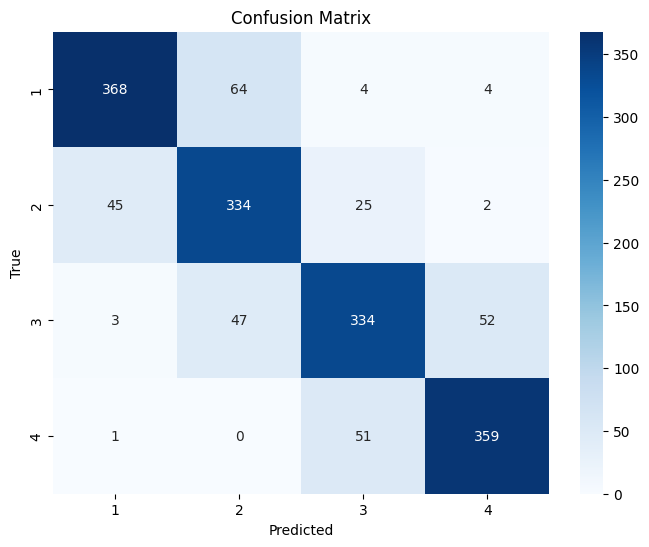

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[1, 2, 3, 4], yticklabels=[1, 2, 3, 4])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Reti Neurali


Per le reti neurali possiamo utilizzare la stessa divisione dei dati effettuata per SVM. Per poter però utilizzare una rete neurale come classificatore in un problema multiclasse, dobbiamo prima trasformare la variabile target in un vettore. La lunghezza del vettore è uguale all numero di classi, in questo caso 4.

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train_categorical = to_categorical(y_train - 1, num_classes=4)
y_val_categorical = to_categorical(y_val - 1, num_classes=4)
y_test_categorical = to_categorical(y_test - 1, num_classes=4)

y_train_val_categorical = to_categorical(y_train_val - 1, num_classes=4)

Scriviamo un codice che ci permetta di eseguire n volte l'addestramento su una rete e ne stampi i risultati medi sul set di test. Utilizziamo questo codice per provare differenti iperparametri sulla rete e confrontare i risultati per evidenziare i migliori

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, LeakyReLU
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.metrics import precision_score, recall_score, f1_score

# Funzione per costruire il modello
def build_model():
    model = Sequential([
        Dense(64, input_shape=(14,), activation='relu' ),
        #LeakyReLU(alpha=0.2),
        BatchNormalization(),
        Dropout(0.2),

        Dense(128, activation='relu'),
        #LeakyReLU(alpha=0.2),
        BatchNormalization(),
        Dropout(0.2),

        Dense(128, activation='relu'),
        #LeakyReLU(alpha=0.2),
        BatchNormalization(),
        Dropout(0.2),


        Dense(64, activation='relu'),
        #LeakyReLU(alpha=0.2),
        BatchNormalization(),
        Dropout(0.2),

        Dense(4, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15, verbose=1, mode='min', restore_best_weights=True)

# Numero di esecuzioni
num_runs = 5
train_accs, test_accs, train_losses, test_losses = [], [], [], []
precisions, recalls, f1_scores = [], [], []

for i in range(num_runs):
    print(f"\nRun {i+1}/{num_runs}...")
    model = build_model()
    history = model.fit(X_train, y_train_categorical, epochs=200, batch_size=64,
                        validation_data=(X_val, y_val_categorical), callbacks=[early_stopping], verbose=0)

    # Valutazione
    train_loss, train_acc = model.evaluate(X_train, y_train_categorical, verbose=0)
    test_loss, test_acc = model.evaluate(X_test, y_test_categorical, verbose=0)

    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test_categorical, axis=1)

    precision = precision_score(y_true, y_pred_classes, average='macro')
    recall = recall_score(y_true, y_pred_classes, average='macro')
    f1 = f1_score(y_true, y_pred_classes, average='macro')

    train_accs.append(train_acc)
    test_accs.append(test_acc)
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Calcolo della media
mean_train_acc = np.mean(train_accs)
mean_test_acc = np.mean(test_accs)
mean_train_loss = np.mean(train_losses)
mean_test_loss = np.mean(test_losses)
mean_precision = np.mean(precisions)
mean_recall = np.mean(recalls)
mean_f1 = np.mean(f1_scores)

print(f"\nMedia Training Accuracy: {mean_train_acc:.4f}")
print(f"Media Test Accuracy: {mean_test_acc:.4f}")
print(f"Media Training Loss: {mean_train_loss:.4f}")
print(f"Media Test Loss: {mean_test_loss:.4f}")
print(f"Media Precision: {mean_precision:.4f}")
print(f"Media Recall: {mean_recall:.4f}")
print(f"Media F1 Score: {mean_f1:.4f}")



Run 1/5...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 142: early stopping
Restoring model weights from the end of the best epoch: 127.
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

Run 2/5...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 117: early stopping
Restoring model weights from the end of the best epoch: 102.
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Run 3/5...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 140: early stopping
Restoring model weights from the end of the best epoch: 125.
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Run 4/5...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 89: early stopping
Restoring model weights from the end of the best epoch: 74.
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Run 5/5...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 98: early stopping
Restoring model weights from the end of the best epoch: 83.
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Media Training Accuracy: 0.9052
Media Test Accuracy: 0.8474
Media Training Loss: 0.2591
Media Test Loss: 0.3912
Media Precision: 0.8470
Media Recall: 0.8475
Media F1 Score: 0.8468


Dopo aver scelto la configurazione migliore dei parametri, creiamo la rete che sarà una rete con 3 layers nascosti (64,128,64), dropout pari al 20 % su ogni layer, 200 iterazioni massime con earl stopping per evitare overfitting, learning rate = 0.001 e batch_size = 64.
La valutiamo facendo la media dei risultati ottenuti su 5 addestramenti


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, LeakyReLU
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Funzione per costruire il modello
def build_model():
    model = Sequential([
        Dense(64, input_shape=(14,)),
        LeakyReLU(alpha=0.1),
        BatchNormalization(),
        Dropout(0.2),

        Dense(128),
        LeakyReLU(alpha=0.1),
        BatchNormalization(),
        Dropout(0.2),

        Dense(64),
        LeakyReLU(alpha=0.1),
        BatchNormalization(),
        Dropout(0.2),

        Dense(4, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15, verbose=1, mode='min', restore_best_weights=True)

# Numero di esecuzioni
num_runs = 5
train_accs, test_accs, train_losses, test_losses = [], [], [], []
precisions, recalls, f1_scores = [], [], []
class_precisions, class_recalls, class_f1s = [], [], []

for i in range(num_runs):
    print(f"\nRun {i+1}/{num_runs}...")
    model = build_model()
    history = model.fit(X_train, y_train_categorical, epochs=200, batch_size=32,
                        validation_data=(X_val, y_val_categorical), callbacks=[early_stopping], verbose=0)

    # Valutazione
    train_loss, train_acc = model.evaluate(X_train, y_train_categorical, verbose=0)
    test_loss, test_acc = model.evaluate(X_test, y_test_categorical, verbose=0)

    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test_categorical, axis=1)

    precision = precision_score(y_true, y_pred_classes, average='macro')
    recall = recall_score(y_true, y_pred_classes, average='macro')
    f1 = f1_score(y_true, y_pred_classes, average='macro')

    report = classification_report(y_true, y_pred_classes, output_dict=True)
    class_precisions.append([report[str(i)]['precision'] for i in range(4)])
    class_recalls.append([report[str(i)]['recall'] for i in range(4)])
    class_f1s.append([report[str(i)]['f1-score'] for i in range(4)])

    print(f"\nRun {i+1} Classification Report:\n{classification_report(y_true, y_pred_classes)}")

    train_accs.append(train_acc)
    test_accs.append(test_acc)
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Calcolo della media
mean_train_acc = np.mean(train_accs)
mean_test_acc = np.mean(test_accs)
mean_train_loss = np.mean(train_losses)
mean_test_loss = np.mean(test_losses)
mean_precision = np.mean(precisions)
mean_recall = np.mean(recalls)
mean_f1 = np.mean(f1_scores)

mean_class_precisions = np.mean(class_precisions, axis=0)
mean_class_recalls = np.mean(class_recalls, axis=0)
mean_class_f1s = np.mean(class_f1s, axis=0)

print(f"\nMedia Training Accuracy: {mean_train_acc:.4f}")
print(f"Media Test Accuracy: {mean_test_acc:.4f}")
print(f"Media Training Loss: {mean_train_loss:.4f}")
print(f"Media Test Loss: {mean_test_loss:.4f}")
print(f"Media Precision: {mean_precision:.4f}")
print(f"Media Recall: {mean_recall:.4f}")
print(f"Media F1 Score: {mean_f1:.4f}")

for i in range(4):
    print(f"\nClasse {i} - Precision: {mean_class_precisions[i]:.4f}, Recall: {mean_class_recalls[i]:.4f}, F1-score: {mean_class_f1s[i]:.4f}")




Run 1/5...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 149: early stopping
Restoring model weights from the end of the best epoch: 134.
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Run 1 Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       440
           1       0.81      0.82      0.81       406
           2       0.83      0.81      0.82       436
           3       0.86      0.92      0.89       411

    accuracy                           0.85      1693
   macro avg       0.85      0.85      0.85      1693
weighted avg       0.85      0.85      0.85      1693


Run 2/5...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 132: early stopping
Restoring model weights from the end of the best epoch: 117.
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Run 2 Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       440
           1       0.77      0.80      0.79       406
           2       0.81      0.78      0.79       436
           3       0.88      0.89      0.88       411

    accuracy                           0.84      1693
   macro avg       0.84      0.84      0.84      1693
weighted avg       0.84      0.84      0.84      1693


Run 3/5...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 117: early stopping
Restoring model weights from the end of the best epoch: 102.
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Run 3 Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       440
           1       0.78      0.78      0.78       406
           2       0.81      0.78      0.80       436
           3       0.87      0.90      0.88       411

    accuracy                           0.84      1693
   macro avg       0.83      0.84      0.84      1693
weighted avg       0.84      0.84      0.84      1693


Run 4/5...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 95: early stopping
Restoring model weights from the end of the best epoch: 80.
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Run 4 Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.89       440
           1       0.77      0.80      0.79       406
           2       0.81      0.76      0.78       436
           3       0.85      0.91      0.88       411

    accuracy                           0.83      1693
   macro avg       0.83      0.83      0.83      1693
weighted avg       0.83      0.83      0.83      1693


Run 5/5...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 118: early stopping
Restoring model weights from the end of the best epoch: 103.
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

Run 5 Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       440
           1       0.80      0.77      0.78       406
           2       0.81      0.81      0.81       436
           3       0.89      0.89      0.89       411

    accuracy                           0.84      1693
   macro avg       0.84      0.84      0.84      1693
weighted avg       0.84      0.84      0.84      1693


Media Training Accuracy: 0.8845
Media Test Accuracy: 0.8406
Media Training Loss: 0.3220
Media Test Loss: 0.4062
Media Precision: 0.8400
Media Recall: 0.8406
Media F1 Score: 0.8400

Classe 0 - Precision: 0.8906, Recall: 0.8805, F1-score: 0.8853

Classe 1 - Precision: 0.7855, Recall: 0.7926, F1-score: 0.7889

Classe 2 - Precision: 0.8145, Recall: 0.7876, F1-score: 0.8008

Classe 3 - Precision: 0.8695, Recal

53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


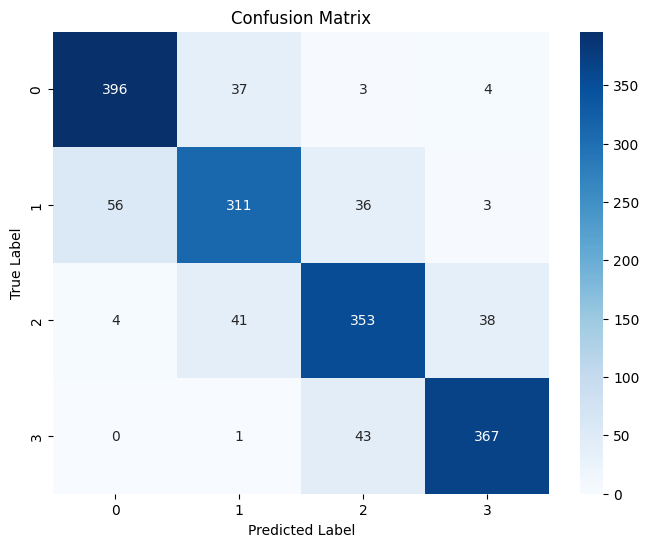

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Predizioni finali sul set di test
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_categorical, axis=1)

# Creazione della matrice di confusione
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Visualizzazione della matrice di confusione
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(4), yticklabels=range(4))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

